# Credit Card Fraud Detection with Decision Trees and SVM

In this notebook I'll comapre the performances of decision trees and SUpport vector machines and give conclusion at the end.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

This is a Kaggle dataset `"Credit Card Fraud Detection"`from the following link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [2]:
df = pd.read_csv("credit_card_fraud_detection.csv")
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. Ourobjective will be to train a model that uses the other variables to predict the value of the Class variable.

For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. 

In [10]:
df.iloc[:,30].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

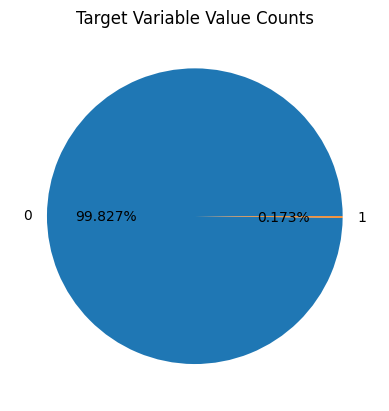

In [8]:
labels = df.Class.unique()

# get the count of each class
sizes = df.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

<Axes: >

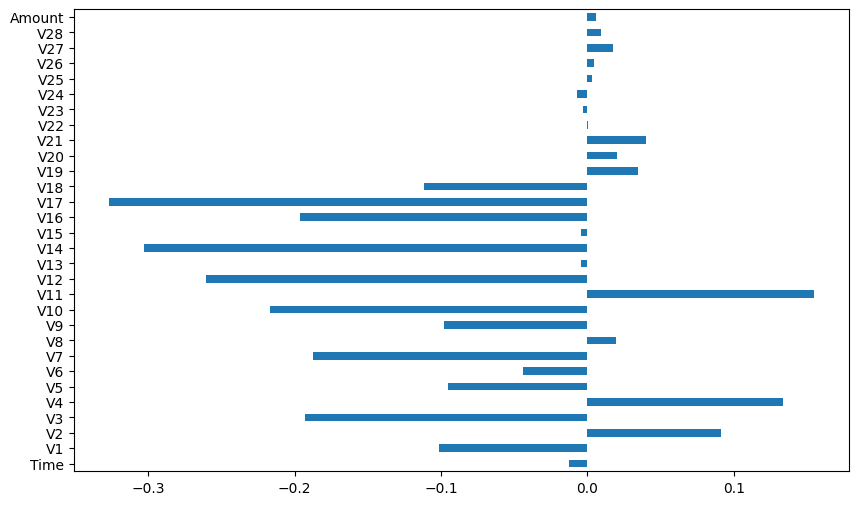

In [9]:
correlation_values = df.corr()['Class'].drop("Class")
correlation_values.plot(kind='barh', figsize=(10, 6))

In [ ]:
df.iloc[:,1:30] = StandardScaler().fit_transform(df.iloc[:,1:30])
df_matrix = df.values

X = df_matrix[:,[3,10,12,14,16,17]]
y = df_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## DEcision tree

In [18]:
w_train = compute_sample_weight('balanced', y_train)

In [19]:
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train, y_train, sample_weight=w_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,35
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Build a Support Vector Machine model with Scikit-Learn

In [22]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,False
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,31


### evaluating Decesion tree

In [ ]:
y_pred_dt = dt.predict_proba(X_test)[:,1]

In [24]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.952


### evaluating SVM

In [25]:
y_pred_svm = svm.decision_function(X_test)

In [26]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.937


## Selecting relevant features(top 5) and training on them

In [28]:
correlation_values = abs(df.corr()['Class']).drop('Class')
correlation_values = correlation_values.sort_values(ascending=False)[:6]
correlation_values

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
Name: Class, dtype: float64

In [31]:
X = df_matrix[:,[3,10,12,14,16,17]]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision tree on top 5

In [33]:
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train, y_train, sample_weight=w_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,35
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
y_pred_dt = dt.predict_proba(X_test)[:,1]
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score after training on top 5 features : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score after training on top 5 features : 0.921


### SVM on top 5

In [35]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,False
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,31


In [38]:
y_pred_svm = svm.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score after training on top 5 features: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score after training on top 5 features: 0.972


As seen, after selecting relevant features, SVM performance improved as compared to Decision tree

## Conclusion

The results show that feature selection has a different impact on the two models. When trained on all features, the Decision Tree achieved a higher `ROC-AUC score (0.952)` compared to SVM `(0.937)`. However, after reducing the feature set to the most highly correlated features, the SVM’s performance improved significantly, reaching a `ROC-AUC score of 0.972`, while the Decision Tree’s performance declined to `0.921`.

This indicates that SVM benefits from a reduced and more informative feature set, likely due to improved generalization and reduced noise. In contrast, the Decision Tree appears to rely on a richer feature space to achieve optimal performance. Overall, the SVM with selected features provides the best predictive performance among the evaluated models.
